# Charting a Pandas Dataframe

You are tasked by prof Oak to create a bar chart of the top 10 legendary Pokemon by special attack.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Read file
pokemon = pd.read_csv(r'../../resources/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [57]:
# Build dataframe with top 10 legendary Pokemon
legendary = pokemon.loc[pokemon['Legendary'] == True].sort_values(by="Sp. Atk", ascending=False).head(10)
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


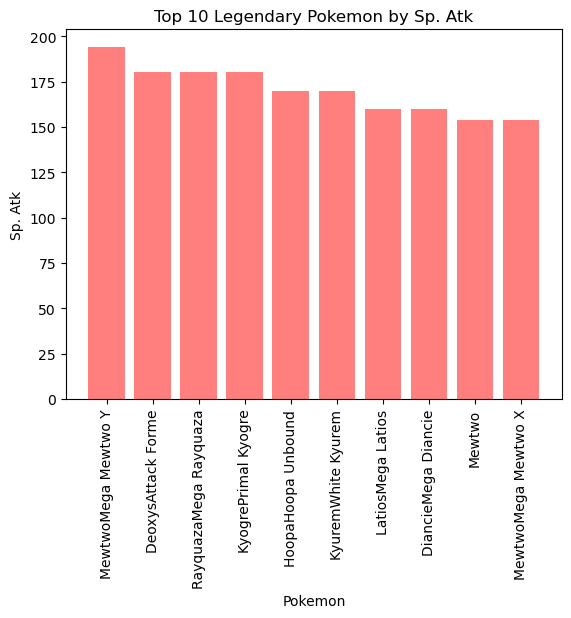

In [58]:
# Set x-axis and tick locations
x_axis = np.arange(len(legendary))
tick_locations = [value for value in x_axis]

# Build plot
plt.xlabel('Pokemon')
plt.ylabel('Sp. Atk')
plt.title('Top 10 Legendary Pokemon by Sp. Atk')
plt.bar(x_axis, legendary['Sp. Atk'], color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, legendary['Name'], rotation=90)
plt.show()

Now professor Birch asks you to create a pie chart of the type 1 for all Pokemon in generation 2.

In [59]:
# Build dataframe with all type 1 pokemon in generation 2 
genTwoType = pokemon.loc[pokemon['Generation'] == 2].groupby(by=['Type 1'])['Type 1'].count().reset_index(name='Count')
genTwoType.head()

,Type 1,Count
0,Bug,12
1,Dark,6
2,Electric,7
3,Fairy,5
4,Fighting,2


In [60]:
# Get colors
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0, 1, len(genTwoType))]

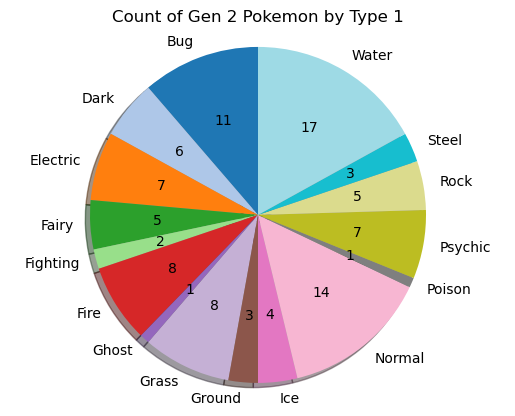

In [61]:
# Create pie chart 
plt.title('Count of Gen 2 Pokemon by Type 1')
plt.pie(genTwoType['Count'], labels=genTwoType['Type 1'], colors=colors, shadow=True, autopct='%.f', startangle=90)
plt.axis('equal')
plt.show()